<a href="https://colab.research.google.com/github/soyab266/test/blob/master/dtreeviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
dtd=DecisionTreeRegressor()
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [144]:
data= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [145]:
df=pd.read_csv(data)

In [148]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df['Cholesterol'].values

In [149]:
df.shape

(200, 6)

In [ ]:
df[['Age','Sex','BP'	,'Cholesterol','Na_to_K']].values


In [201]:
df['Sex'].replace({'F': 0, 'M':1 }, inplace=True)
df['BP'].replace({'LOW':0, 'NORMAL':1,'HIGH':2},inplace=True)
df['Cholesterol'].replace({'NORMAL':0, 'HIGH':1}, inplace=True)
df['Drug'].replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4},inplace=True)

In [202]:
X=df[['Age','Sex','BP'	,'Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  2.   ,  1.   , 25.355],
       [47.   ,  1.   ,  0.   ,  1.   , 13.093],
       [47.   ,  1.   ,  0.   ,  1.   , 10.114],
       [28.   ,  0.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  0.   ,  0.   ,  1.   , 18.043]])

In [203]:
y=df['Drug'].values
y[0:5]

array([4, 2, 2, 3, 4])

In [204]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=3)

In [205]:
X_train.shape

(140, 5)

In [206]:
y_train.shape

(140,)

In [207]:
X_test.shape

(60, 5)

In [208]:
y_test.shape

(60,)

In [209]:
dts=DecisionTreeClassifier(criterion="entropy",max_depth=4      )
dts.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [210]:
y_pred=dts.predict(X_test)

In [211]:
accuracy_score(y_pred, y_test)

0.9833333333333333

In [212]:
param_grid={
    'criterion':["gini",'entropy'],
    'splitter':["best",'random'],
    'max_depth':[2,3,4,5,6,7,8,9], 
    'min_samples_split':[2], 
    'min_samples_leaf':[1], 
    'min_weight_fraction_leaf':[0],
    'max_features':["auto", "sqrt", "log2"],
    
    'max_leaf_nodes':[2], 
    'min_impurity_decrease':[0]
    
}

In [213]:
grid=GridSearchCV(dts,param_grid=param_grid)

In [214]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2], 'min_impurity_decrease': [0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best', 'random']})

In [215]:
grid.best_score_

0.7285714285714286

In [216]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [217]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='log2', max_leaf_nodes=2,
                       min_impurity_decrease=0, min_weight_fraction_leaf=0)

[Text(0.625, 0.9, 'X[4] <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'X[2] <= 1.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.375, 0.3, 'X[2] <= 0.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.75, 0.5, 'X[0] <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

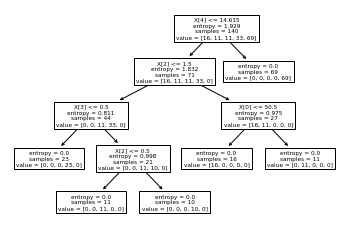

In [218]:

from sklearn.tree import plot_tree
plot_tree(dts)


In [ ]:
!pip install dtreeviz
from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz


In [232]:
viz=dtreeviz(dts,
             X_train,
             y_train,
            
             feature_names=['Age','Sex','BP'	,'Cholesterol','Na_to_K'],
             target_name='Drug',scale=2,show_node_labels=True,
             show_just_path=True  )
             
             
             
             

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


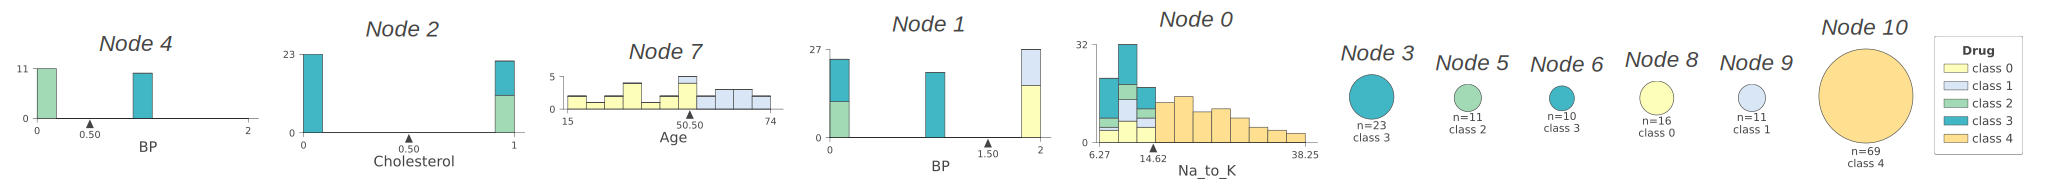

In [233]:
viz
